# APA-Entrega 1
## Ejercicio 5

Mario Fernández Simón

In [1]:

# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
#!pip install pandas --upgrade --user --quiet
#!pip install numpy --upgrade --user --quiet
#!pip install scipy --upgrade --user --quiet
#!pip install statsmodels --upgrade --user --quiet
#!pip install scikit-learn --upgrade --user --quiet
#!pip install plotly --upgrade --user --quiet
!pip install apafib --upgrade --user --quiet
!pip install yellowbrick --upgrade --user --quiet

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import apafib

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
import pandas as pd

from numpy.linalg import inv, svd, pinv
import numpy as np

from sklearn.linear_model import linearRegPosression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import set_config

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import residuals_plot

import warnings

set_config(display='text')
warnings.filterwarnings('ignore')

sns.set()

ImportError: cannot import name 'linearRegPosression' from 'sklearn.linear_model' (/home/mario/.local/lib/python3.10/site-packages/sklearn/linear_model/__init__.py)

In [ ]:
data = apafib.load_BCN_UK()

## Apartado A

Divide el conjunto de datos en entrenamiento y te (80 %/20 %). Haz una exploración mínima del conjunto de datos de entrenamiento observando las relaciones entre las variables,especialmente con la variable objetivo. Describe las cosas que hayas visto que te parezcan interesantes. Transforma las variables adecuadamente para poder ajustar un modelo de regresión tanto para el conjunto de entrenamiento como para el de test.


El primer paso que seguiremos será transformar los datos para que sea más fácil su exploración. Después utilizaremos diversas técnicas para hacernos una idea de las características que tiene nuestro dataset. 

In [ ]:
data.rename(columns={
    'Carburants: Gasolina 95 i diesel A / Gasolina 95':'Gasoil',
    'Contaminants ambientals: NO₂ i PM₁₀ (Eixample) / Mitjana NO2': 'NO2 mitjana',
    'Contaminants ambientals: NO₂ i PM₁₀ (Eixample) / Mitjana PM10' : 'PM10 mitjana',
    'Dades meteorològiques: Precipitació / Barcelona - Zona Universitària': 'Lluvia UNI',
    'Dades meteorològiques: Temperatura / Barcelona - Zona Universitària': 'Tempe UNI',
    'Dades meteorològiques: Vent / Barcelona - Zona Universitària' : 'Viento UNI',
    'Matriculacions de vehicles a Barcelona / Turismes': 'Matriculaciones',
    'Peix i marisc / Llenguado': 'Llenguado',
    'Peix i marisc / Llobarro' : 'Llobarro',
    'Peix i marisc / Lluç' : 'Lluç',
    'Peix i marisc / Orada' : 'Orada',
    'Fruites i hortalisses / Patata' : 'Patata',
    'Visitants a Barcelona segons país d’origen / Regne Unit': 'Turistas de UK'
}, inplace=True)
data.head()

,Gasoil,NO2 mitjana,PM10 mitjana,Lluvia UNI,Tempe UNI,Viento UNI,Matriculaciones,Llenguado,Llobarro,Lluç,Orada,Patata,Turistas de UK
0,1.2503,22.54,9.58,0.0,8.01,5.61,0.0,13.0,5.0,6.0,4.2,0.4,668.0
1,1.2503,21.29,11.54,0.0,5.96,6.51,0.0,13.0,5.0,6.0,4.2,0.4,858.0
2,1.2511,29.54,13.88,0.0,5.31,5.52,0.0,13.0,5.0,6.0,4.2,0.4,756.0
3,1.2513,33.38,12.83,0.0,5.72,5.13,21.0,13.0,5.0,6.0,4.2,0.4,787.0
4,1.2507,35.17,15.54,0.0,5.23,4.25,54.0,13.0,5.0,6.0,4.2,0.4,799.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gasoil,365.0,1.432250,0.085728,1.2503,1.3765,1.4442,1.5016,1.5673
NO2 mitjana,365.0,37.541726,12.109537,10.5000,28.7900,35.8300,45.7600,86.3300
PM10 mitjana,365.0,26.337918,10.938923,5.0800,19.8300,25.2500,31.1700,120.6200
Lluvia UNI,365.0,0.928493,4.056891,0.0000,0.0000,0.0000,0.0000,50.8000
Tempe UNI,365.0,17.186411,6.033962,4.6400,12.3600,16.3600,23.4600,28.6600
Viento UNI,365.0,4.623973,1.754966,1.6300,3.4500,4.3300,5.3900,12.7300
Matriculaciones,365.0,59.202740,38.920707,0.0000,35.0000,51.0000,73.0000,236.0000
Llenguado,365.0,13.772466,2.110899,8.5000,12.8000,13.9000,15.0000,19.0000
Llobarro,365.0,5.053699,0.353505,4.5000,4.8000,5.0000,5.4000,5.9500
Lluç,365.0,4.302329,1.079658,1.8000,3.5000,4.0000,5.0000,7.5000


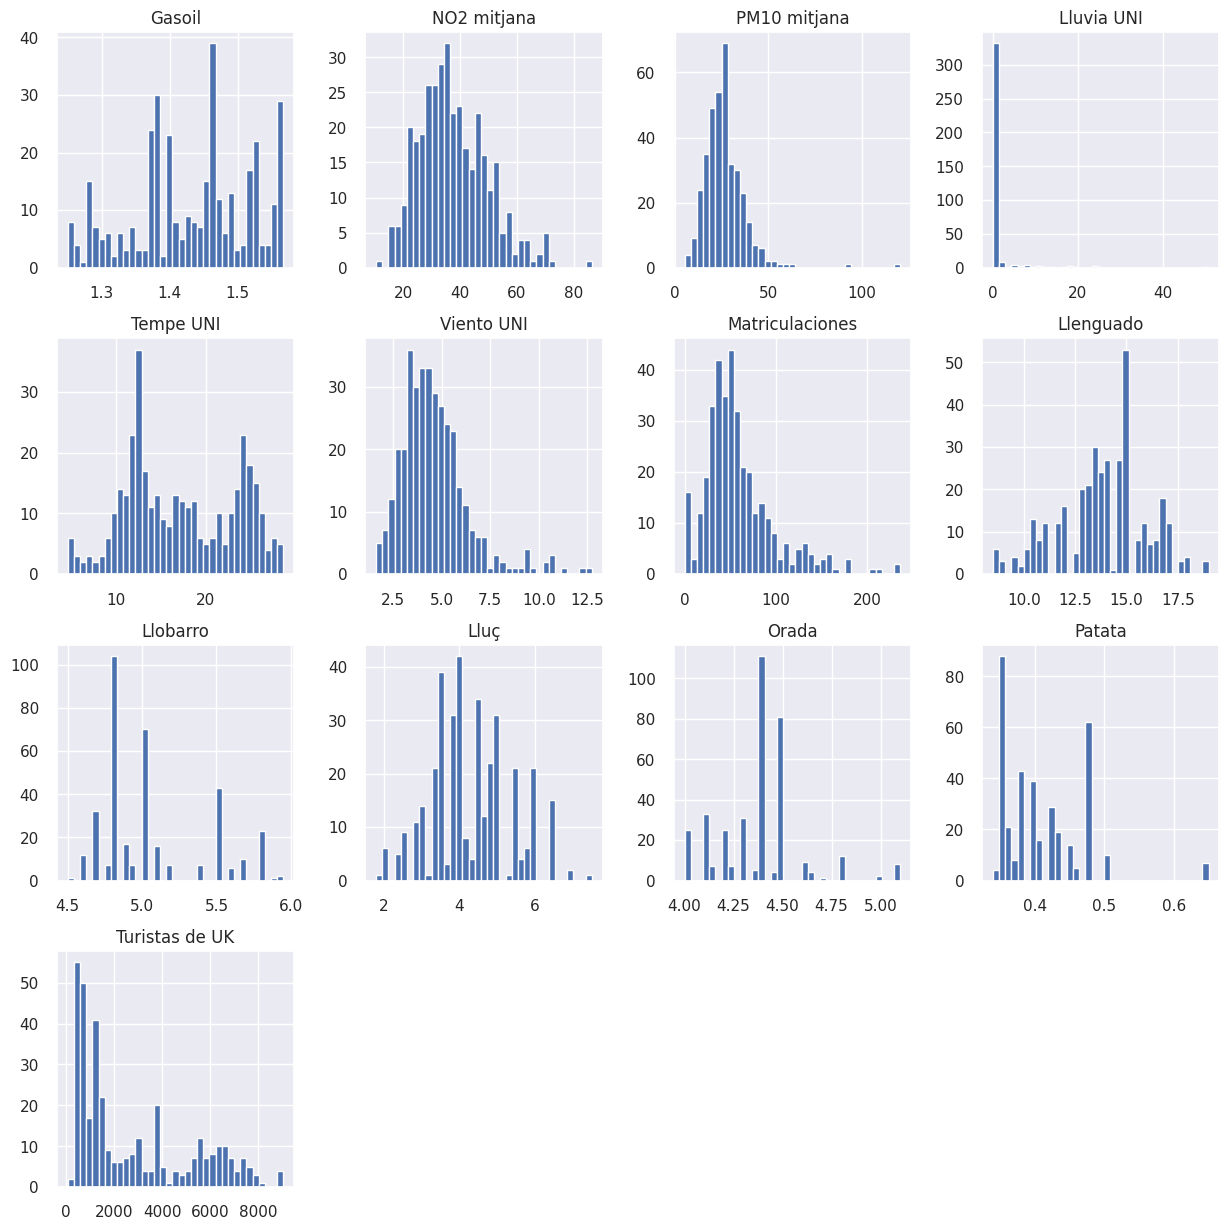

In [ ]:
data.hist(bins=35,figsize=(15,15));

De los histogramas podemos observar que algunos de nuestros datos si siguen una distribución gausiana como la NO2 mitjana. Otras en cambio, tan solo se parecen un poco a una distribución gausiana pero sin llegar a serlo. 

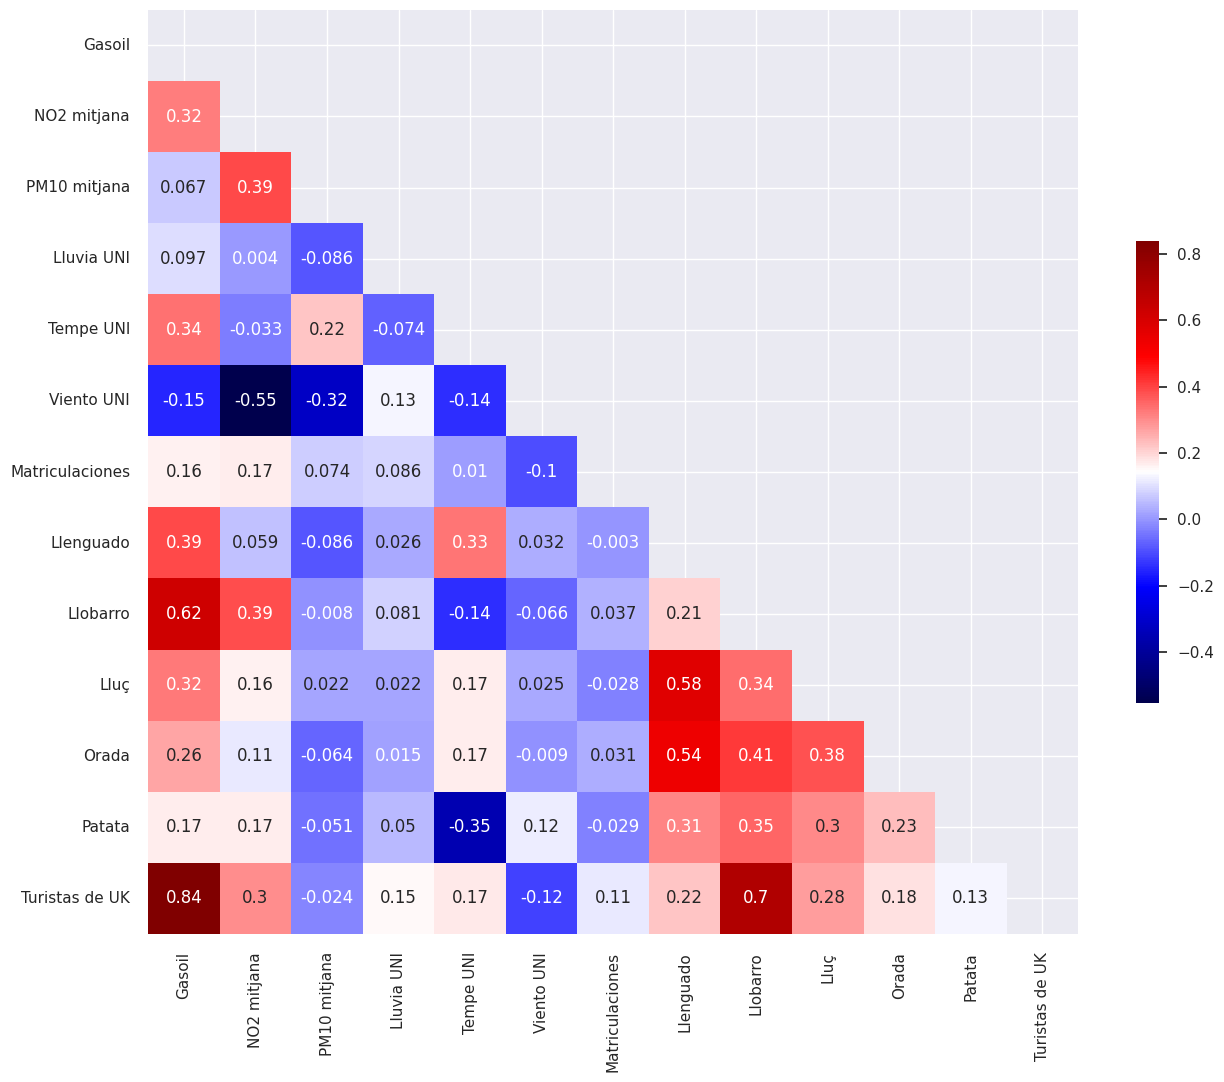

In [ ]:
Data_frame = pd.DataFrame(data)
mat=Data_frame.corr().round(3)
plt.figure(figsize = (15,12))
sns.heatmap(data = mat,cmap='seismic', annot = True, mask = np.triu(np.ones_like(mat, dtype=bool)), cbar_kws={"shrink": .5});

A continuación, podemos ver la relación que hay entre las variables. Claramente, se observa como las varibles de alimentos estan relacionadas entre ellas y como "Gasoil" tiene un fuerte impacto en varias variables.

Dividimos los datos en entrenamiento/test.

In [ ]:
variables = data[data.columns[:-1]]
objetivo = data['Turistas de UK']
VarTrain, VarTest, ObjTrain, ObjTest = train_test_split(variables, objetivo, test_size=0.2, random_state=0)

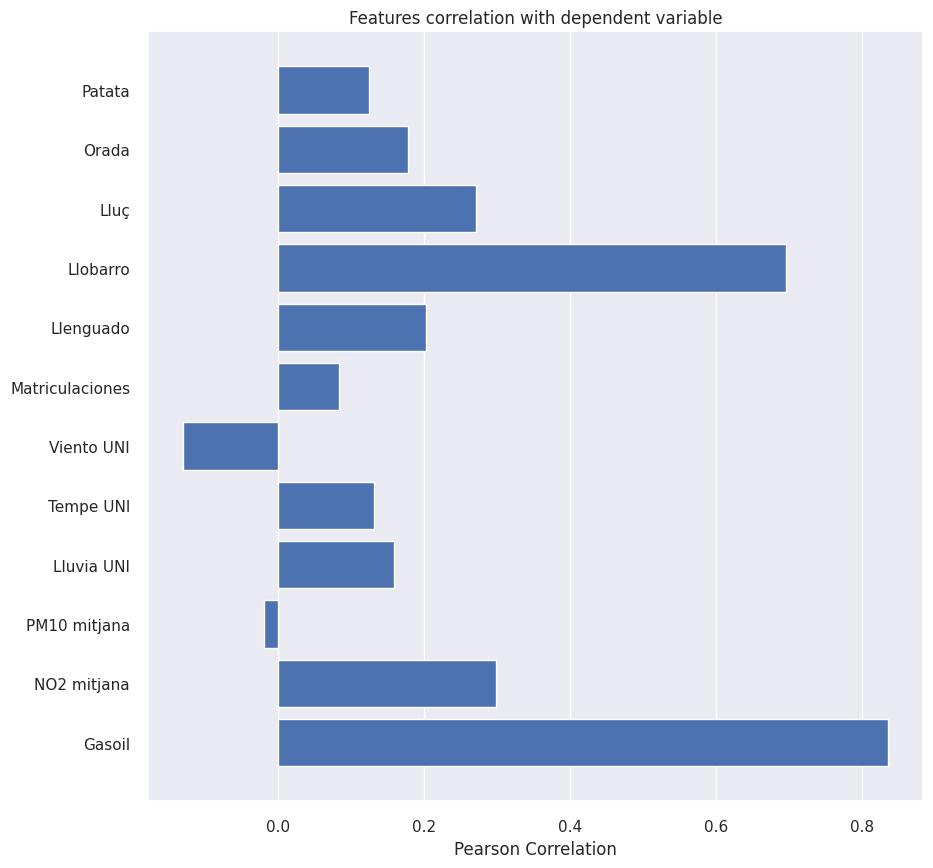

In [ ]:
VarTrainFrame = pd.DataFrame(VarTrain)
plt.figure(figsize=(10, 10))
corre = feature_correlation(VarTrainFrame, ObjTrain, labels=list(VarTrainFrame.columns),method='pearson')

Como se ha observado antes, "Gasoil" tiene una fuerte correlación con la variable objetivo y como las variables del tiempo juegan un papel menos importante. 
Por último, nos ha llamado la atención 4 las variables NO2 mitjana, PM10 mitjana, Lluvia UNI y Matriculaciones, ya que tienen unos valores máximos muy alejados de la media. Vamos a ver esos extremos. 

<Axes: xlabel='NO2 mitjana'>

<Axes: xlabel='PM10 mitjana'>

<Axes: xlabel='Lluvia UNI'>

<Axes: xlabel='Matriculaciones'>

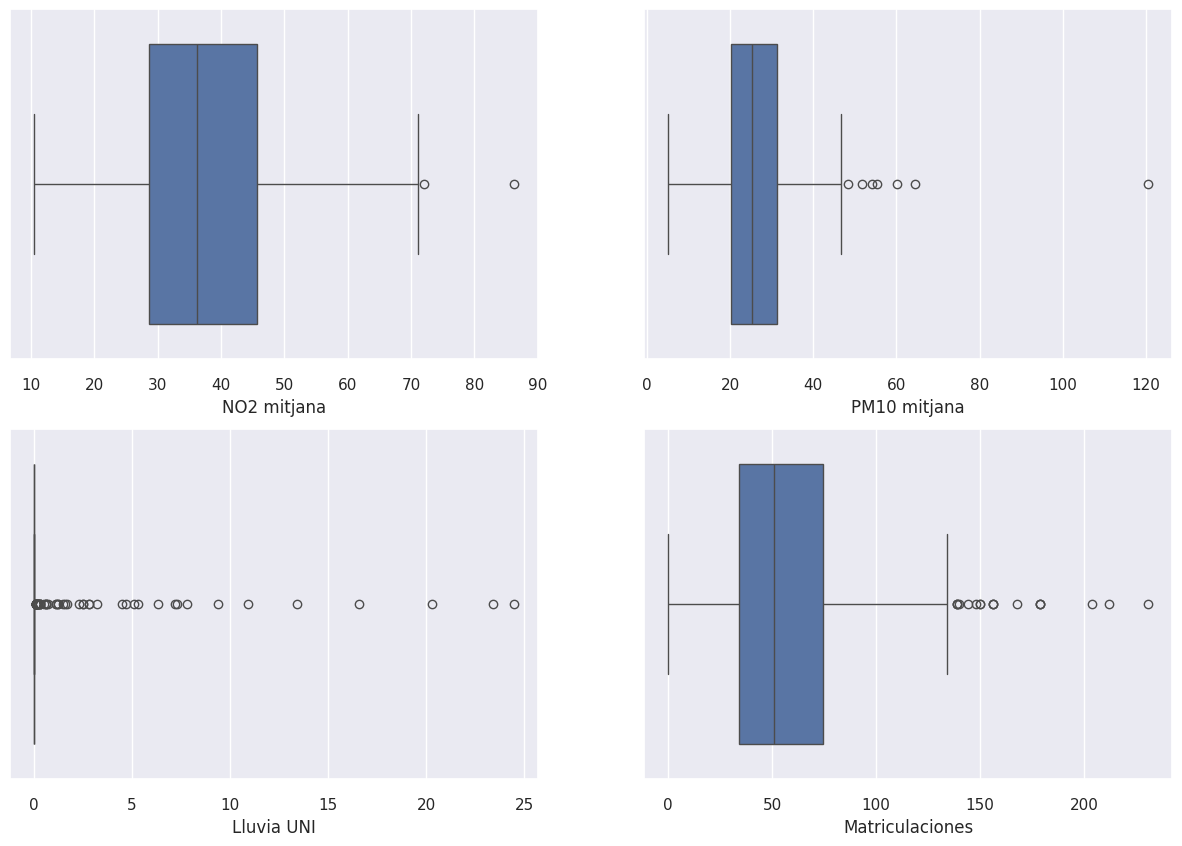

In [ ]:
fig, axses= plt.subplots(2, 2, figsize=(15,10));
RareVars = [1,2,3,6]
i = 0;
for i in range(0, 2):
    for j in range(0, 2):
        sns.boxplot(data=VarTrain, ax=axses[i][j], x=VarTrain.columns[RareVars[i*2+j]]);

Para NO2 mitjana y PM10 mitjana podemos ver como hay valores que podrían afectar a nuestro modelo y quizás sería conveniente quitarlos. 
Para las otras 2, vemos que hay demasiados valores extremos y no sería conveniente eliminarlos. Además para la Lluvia UNI tiene sentido que sea así debido a qué no suele llover. 

In [ ]:
VarTrainFrame.isna().sum().sort_values(ascending=False)

Gasoil             0
NO2 mitjana        0
PM10 mitjana       0
Lluvia UNI         0
Tempe UNI          0
Viento UNI         0
Matriculaciones    0
Llenguado          0
Llobarro           0
Lluç               0
Orada              0
Patata             0
dtype: int64

Para finalizar, miramos si hay valores perdidos. No se encuentra ninguno.

## Apartado B
Aplica Análisis de Componentes Principales (PCA) al conjunto de entrenamiento y visualízalo en 2D representando la variable objetivo. ¿Crees que puede haber una relación entre las variables del conjunto de datos y la variable objetivo? ¿Por qué?

In [ ]:
scaler = StandardScaler()
VarsTrainSTD = scaler.fit_transform(VarTrain)
VarsTestSTD = scaler.transform(VarTest)

In [ ]:
VariablesPCA = PCA().fit(VarsTrainSTD)

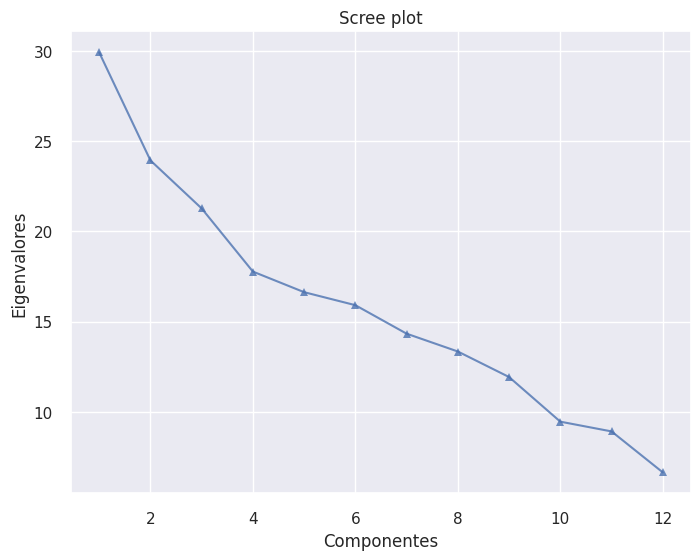

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(VariablesPCA.singular_values_ )+1),VariablesPCA.singular_values_ ,alpha=0.8,marker='^')
Target_label = plt.ylabel('Eigenvalores')
Vars_label = plt.xlabel('Componentes')
plt.title('Scree plot');

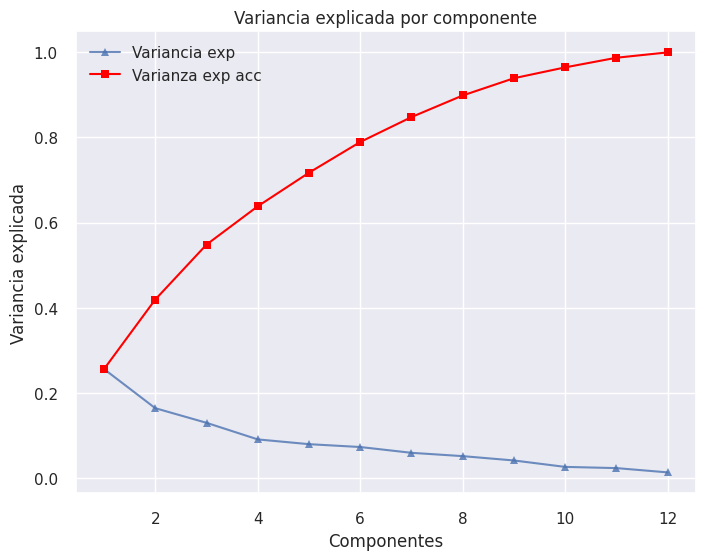

In [ ]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(VariablesPCA.explained_variance_ratio_ )+1),VariablesPCA.explained_variance_ratio_ ,alpha=0.8,marker='^',label="Variancia exp");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(VariablesPCA.explained_variance_ratio_ )+1),np.cumsum(VariablesPCA.explained_variance_ratio_),c='red',marker='s',label="Varianza exp acc");
plt.title('Variancia explicada por componente');
plt.legend();

Una vez estudiada la variancia podemos ver como no podremos observar la separabilidad en 2D, ya que con 2 variables a penas se llega al 40% de variancia explicada acumulativa. Si quisieramos llegar al 80% deberíamos coger 6 o 7 variables lo cual haría imposible ver esa separabilidad con 2 variables como se ha comentado antes. 

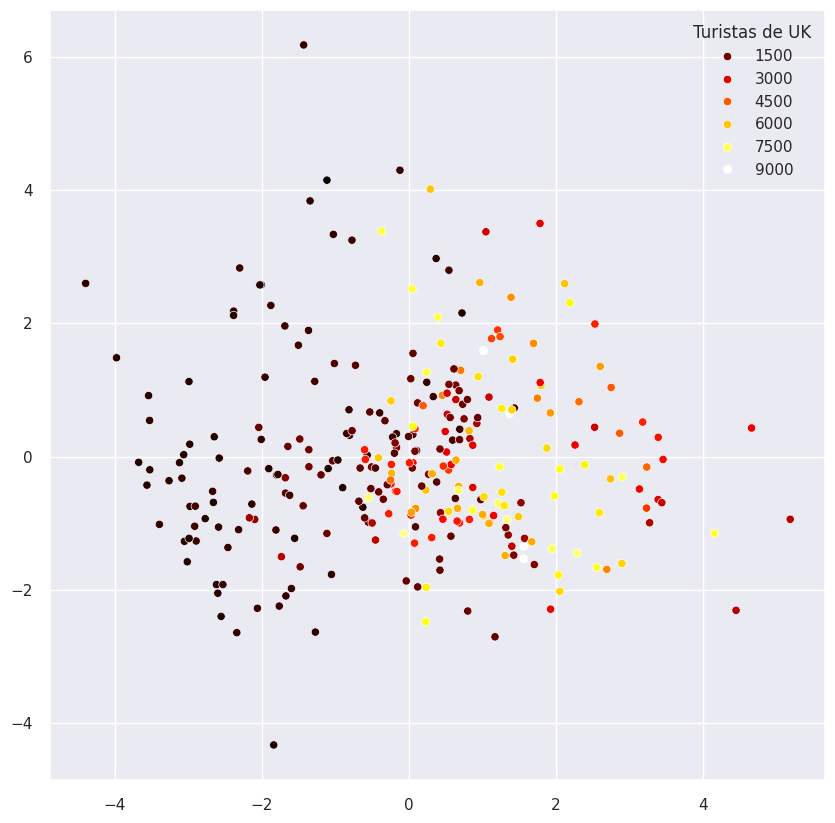

In [ ]:
VarTrans = VariablesPCA.transform(VarsTrainSTD)
plt.figure(figsize=(10,10));
sns.scatterplot(x=VarTrans[:,0], y=VarTrans[:,1], hue=ObjTrain, palette="hot");

Pese al analisis de antes, podemos ver como si se aprecia una ligera separabilidad en los valores de la izquierda.

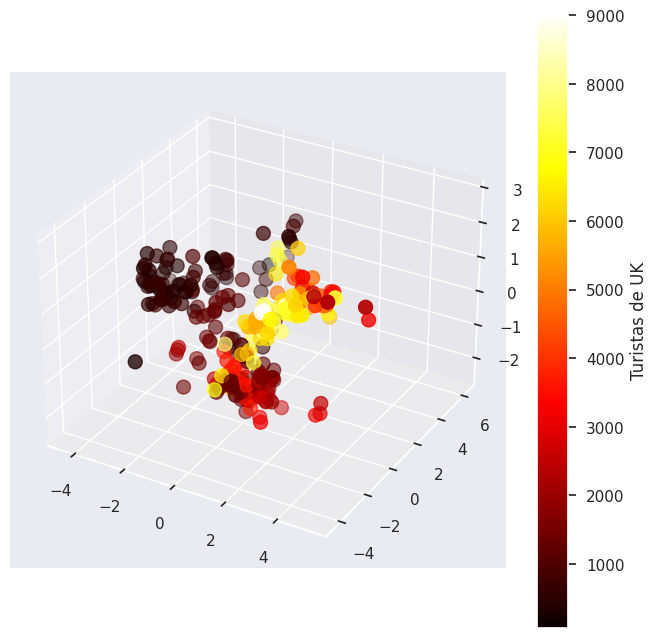

In [ ]:
cmap = plt.get_cmap('hot')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

scatter = plt.scatter(VarTrans[:, 0],
            VarTrans[:, 1],
            zs=VarTrans[:, 2], 
            c=ObjTrain, cmap=cmap, s=100);
cbar = plt.colorbar(scatter)
cbar.set_label("Turistas de UK")

plt.show()

Se puede observar como los valores más grandes se acumulan en el centro. 

## Apartado C
Ajusta una regresión lineal, una regresión Ridge y una regresión LASSO a los datos ¿Te parece suficientemente bueno el resultado? Representa los valores de la variable objetivo para el conjunto de test contra las predicciones y el qqplot. ¿Qué modelo te parece mejor?

In [ ]:
linealReg = LinearRegression()
linealReg.fit(VarsTrainSTD, ObjTrain)
targPredLr = linealReg.predict(VarsTrainSTD)
lrcv = np.mean(cross_val_score(linealReg, VarsTrainSTD, ObjTrain))

print(f'Cross Validation:' ,lrcv)

LinearRegression()

Cross Validation: 0.7587967239258779


In [ ]:
# Probando una serie de valores hemos decidido que estos se adaptan mejor a la representación
alphas = range(1, 50, 3) 

In [ ]:
ridgeCV =RidgeCV(alphas=alphas,cv=5).fit(VarsTrainSTD,ObjTrain)
ridgeCv = ridgeCV.best_score_
TargPredRidge = ridgeCV.predict(VarsTestSTD)

print(f'Cross Validation: {ridgeCv:3.8f} || Best alpha: {ridgeCV.alpha_} ')

Cross Validation: 0.76372317 || Best alpha: 16 


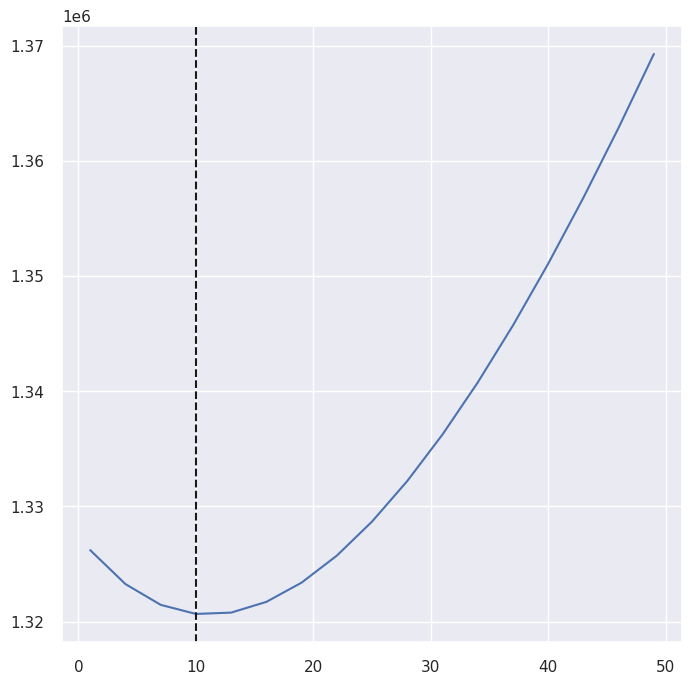

In [ ]:
plt.figure(figsize=(8,8))
vis = AlphaSelection(RidgeCV(alphas=alphas));
vis.fit(VarsTrainSTD, ObjTrain);

La alpha óptimo para la regresión Ridge obtenido es 16.

In [ ]:
lassoCV =LassoCV(alphas=alphas,cv=5).fit(VarsTrainSTD,ObjTrain)
lassoCv =  np.mean(cross_val_score(lassoCV, VarsTrainSTD,ObjTrain))
TargPredLasso = lassoCV.predict(VarsTestSTD)

print(f'Cross Validation: {lassoCv:3.8f} || Best alpha: {lassoCV.alpha_} ')

Cross Validation: 0.76415765 || Best alpha: 40 


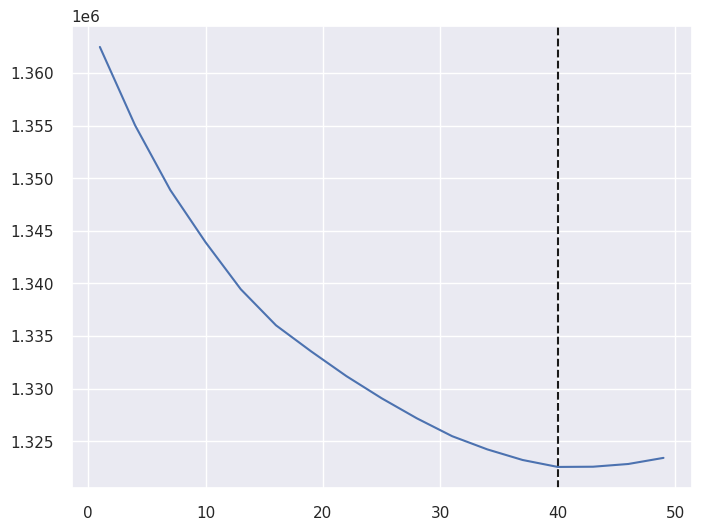

In [ ]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(LassoCV(alphas=alphas));
vis.fit(VarsTrainSTD, ObjTrain);

La alpha óptimo para la regresión LASSO obtenido es 40.

In [ ]:
linealRegR2 = r2_score(ObjTrain,lr.predict(VarsTrainSTD)) 
ridgeR2 = r2_score(ObjTrain,ridgeCV.predict(VarsTrainSTD))
lassoR2 = r2_score(ObjTrain,lassoCV.predict(VarsTrainSTD))

In [ ]:
print("                     Linear               Ridge                LASSO")
print("CV:          ", lrcv, " ", ridgecv, " ", lassoCv)
print("Train R2:    ", lrR2, " ", ridgeR2, " ", lassoR2)
print("Best alpha:  ", 0, "                  ", ridgeCV.alpha_, "                 ", lassoCV.alpha_)


                     Linear               Ridge                LASSO
CV:           0.7587967239258779   0.7637079145412835   0.7641576541308127
Train R2:     0.7910049876084811   0.7891545183190323   0.7872206555483707
Best alpha:   0                    16                   40


Como se puede apreciar, los valores obtenidos para CV y R2 no son altos para ninguno de los 3 casos. Lo cual nos hace sospechar que podemos tener algun problema al ajustar los datos o que nuestro modelo no es del todo correcto.

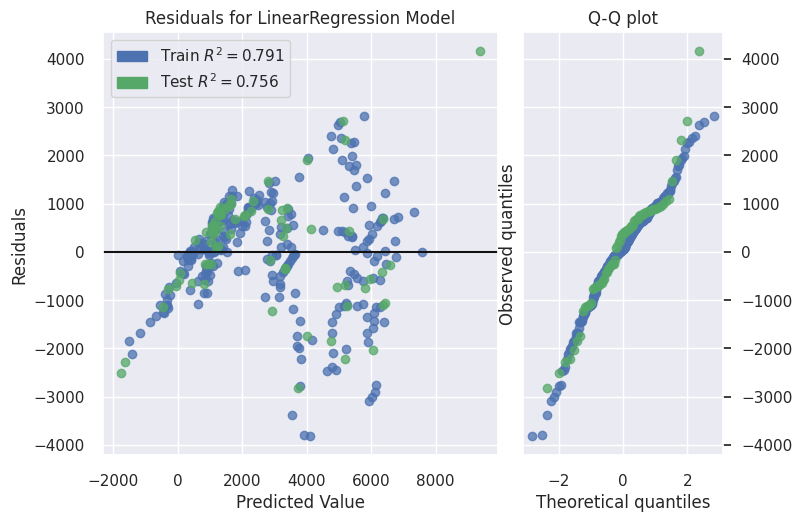

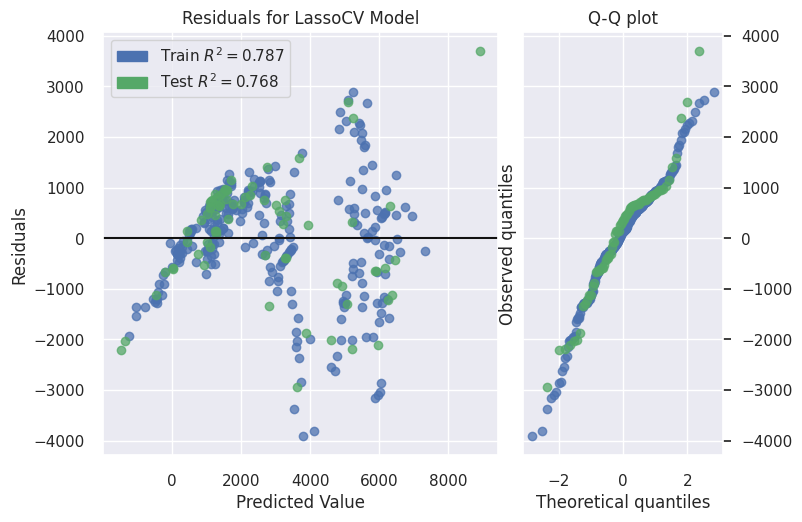

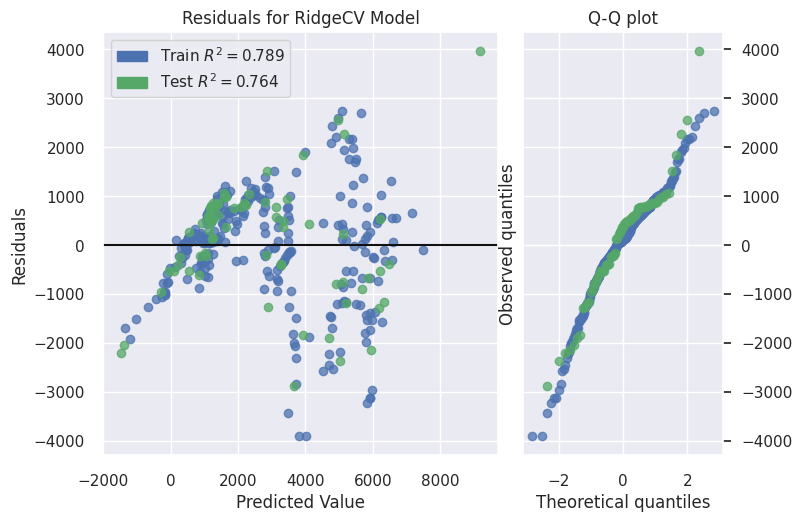

In [ ]:
linealQQP = residuals_plot(linealReg, VarsTrainSTD, ObjTrain, VarsTestSTD, ObjTest, qqplot=True, hist=False, is_fitted=True)
lassoQQP = residuals_plot(lassoCV, VarsTrainSTD, ObjTrain, VarsTestSTD, ObjTest, qqplot=True, hist=False, is_fitted=True)
ridgeQQP = residuals_plot(ridgeCV, VarsTrainSTD, ObjTrain, VarsTestSTD, ObjTest, qqplot=True, hist=False, is_fitted=True)

Con las representaciones hemos podido comprobar que las sospechas de antes eran correctas. En las tres gráficas vemos como hay una desviación de la recta, lo cual significa que nuestro modelo no está lo suficientemente ajustado. 

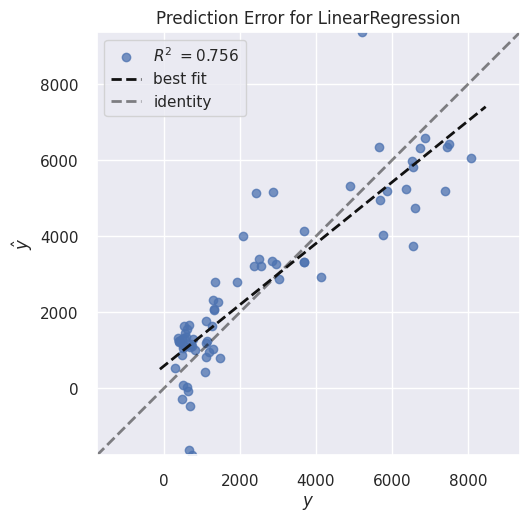

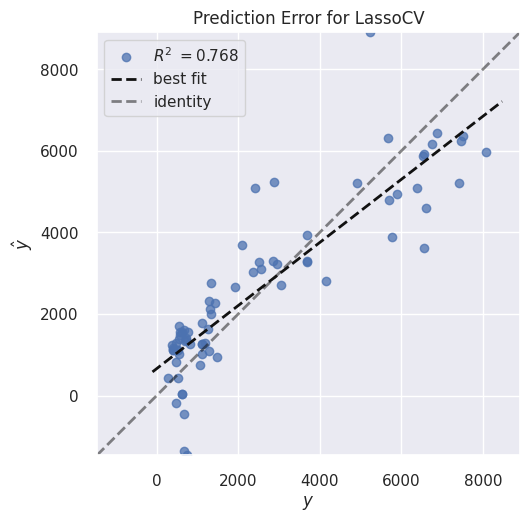

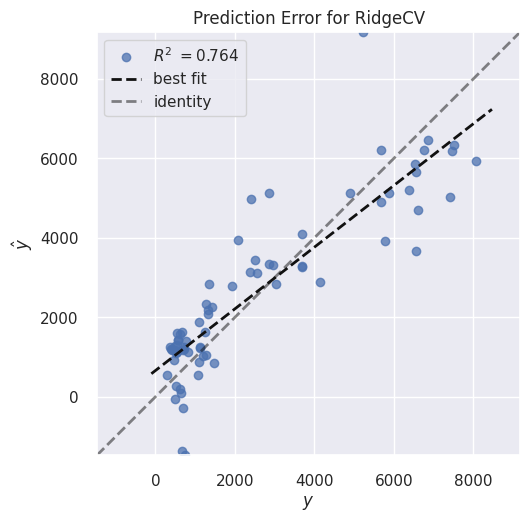

In [ ]:
linealpredR = prediction_error(linealReg, VarsTestSTD, ObjTest, is_fitted=True)
lassopredR = prediction_error(lassoCV, VarsTestSTD, ObjTest, is_fitted=True)
ridgepredR = prediction_error(ridgeCV, VarsTestSTD, ObjTest, is_fitted=True)

Si observamos los gráficos vemos como hay una acumulación excesiva de los datos en los valores entre 1000 y 2000 y no estan repartidos uniformemente. Esto influye en que los modelos no hayan sido capaces de ajustarse correctamente. 
Si tuvieramos que escoger entre uno de los tres, nos quedaríamos con la regresión lineal, ya que es la que tiene la recta más ajustada. Aun así, ninguno de los tres es un buen modelo.  

## Apartado D
La regresión LASSO nos ha indicado qué variables aparentemente no tienen influencia en nuestros amigos Británicos, pero todavía podríamos reducir algo más el misterio. La regresión lineal y la LASSO tienen el parámetro booleano positive que obliga que los coeficientes sean todos positivos. Repite el ajuste de estos dos modelos con este parámetro
a cierto ¿Ha afectado mucho a la calidad del modelo? Decide de las variables que han quedado cuál es la que tiene menos sentido, elimínala del conjunto de datos y ajusta un modelo de regresión lineal sin restricciones. ¿Ha afectado mucho a la calidad del modelo? Comenta el resultado.

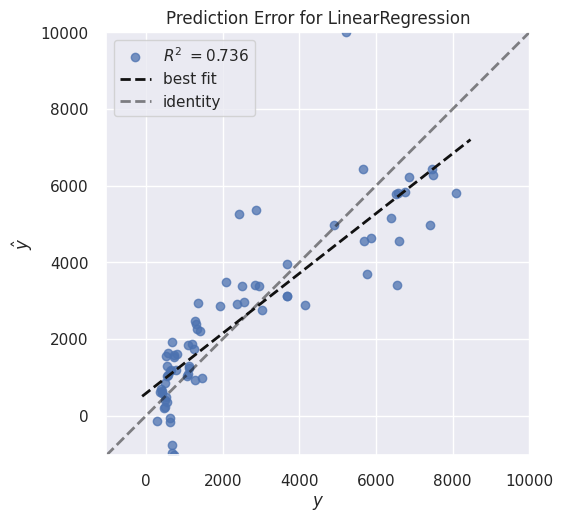

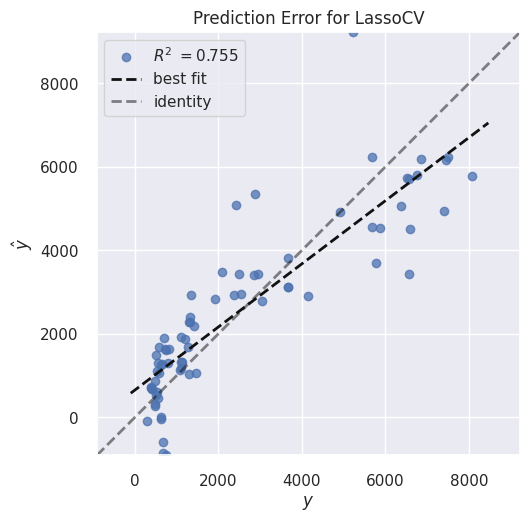

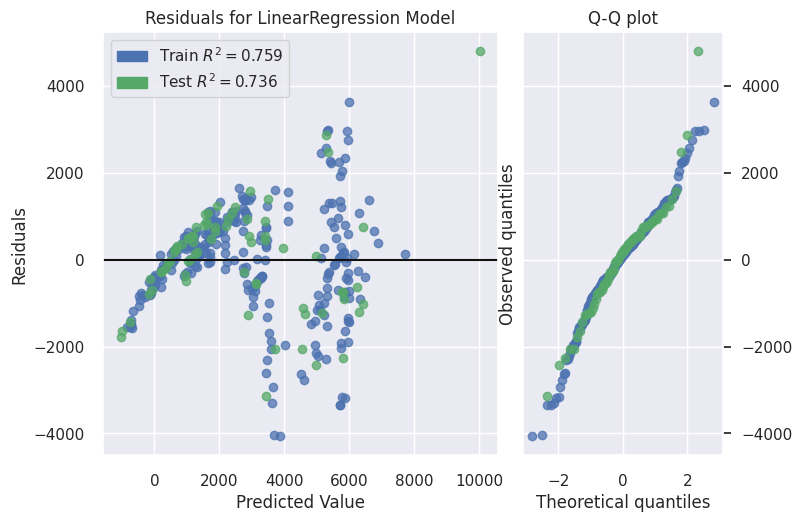

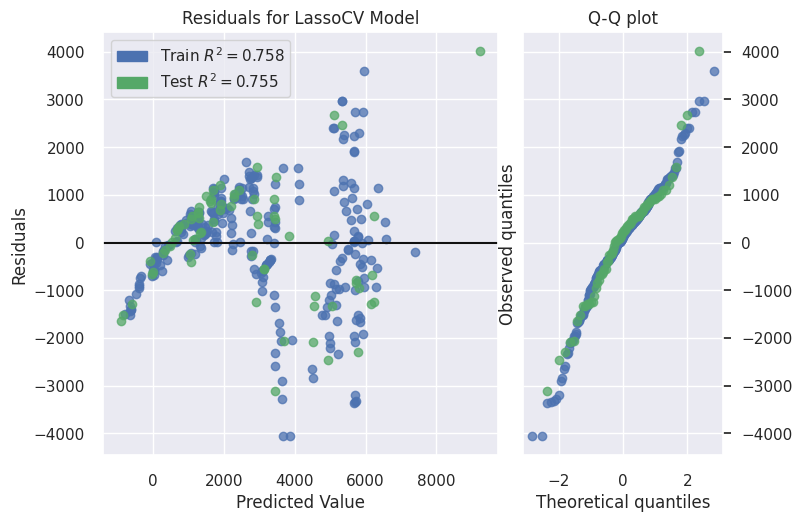

In [ ]:
# Solo teniendo en cuenta pesos positivos
linearRegPos = LinearRegression(positive=True).fit(VarsTrainSTD, ObjTrain)
lassoPos =LassoCV(alphas=alphas,cv=5, positive=True).fit(VarsTrainSTD,ObjTrain)

predic = prediction_error(linearRegPos, VarsTestSTD, ObjTest, is_fitted=True)
predic = prediction_error(lassoPos, VarsTestSTD, ObjTest, is_fitted=True)

residual = residuals_plot(linearRegPos, VarsTrainSTD, ObjTrain, VarsTestSTD, ObjTest, is_fitted=True, qqplot=True, hist=False);
residual = residuals_plot(lassoPos, VarsTrainSTD, ObjTrain, VarsTestSTD, ObjTest, is_fitted=True, qqplot=True, hist=False);

Al obligar a que todos los pesos sean positivos hemos obtenido una predicción aun peor de la que ya teníamos si comparamos las gráficas obtenidas con las de antes. El R2 también ha empeorado.  

<Axes: >

<Figure size 2000x200 with 0 Axes>

<Axes: >

<Figure size 2000x200 with 0 Axes>

<Axes: >

<Figure size 2000x200 with 0 Axes>

<Axes: >

<Figure size 2000x200 with 0 Axes>

<Axes: >

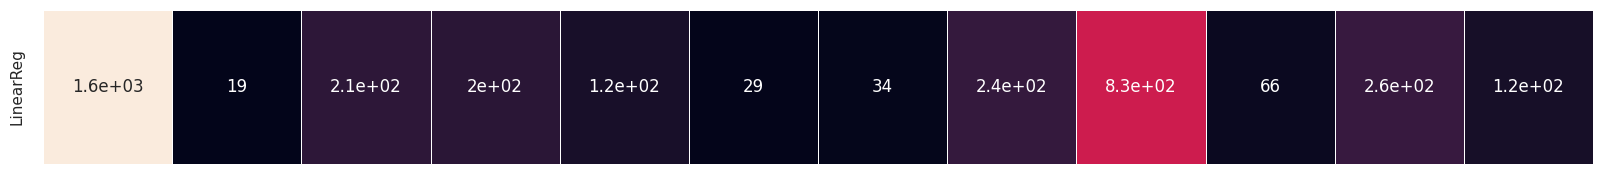

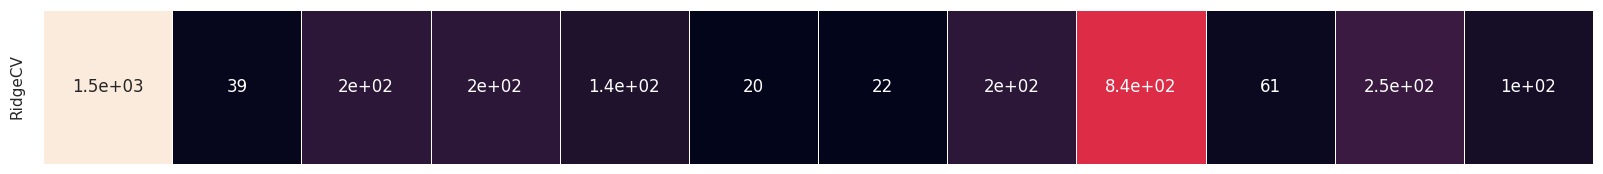

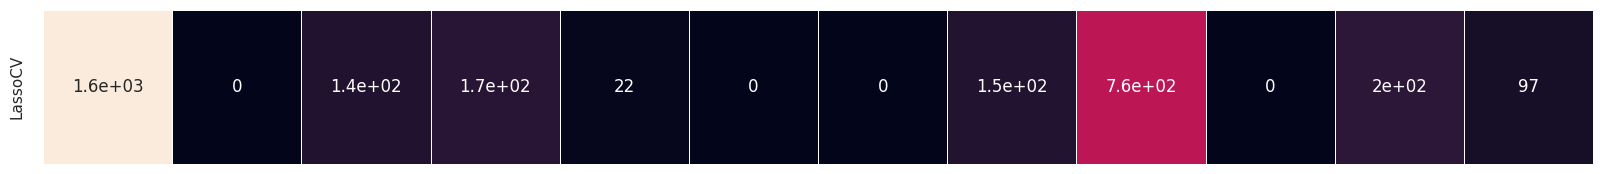

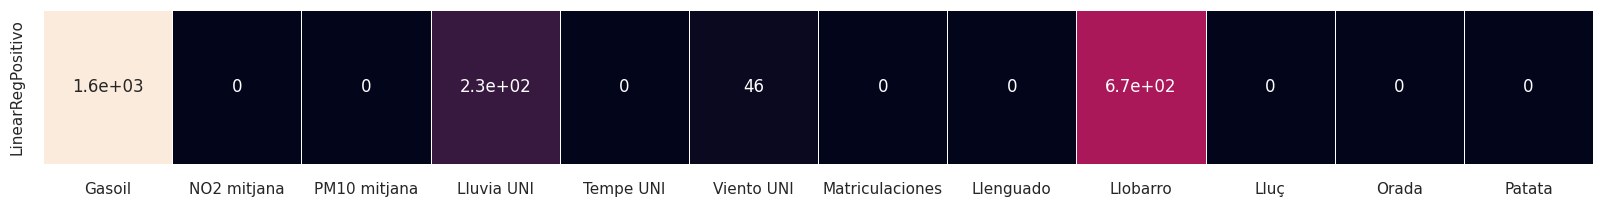

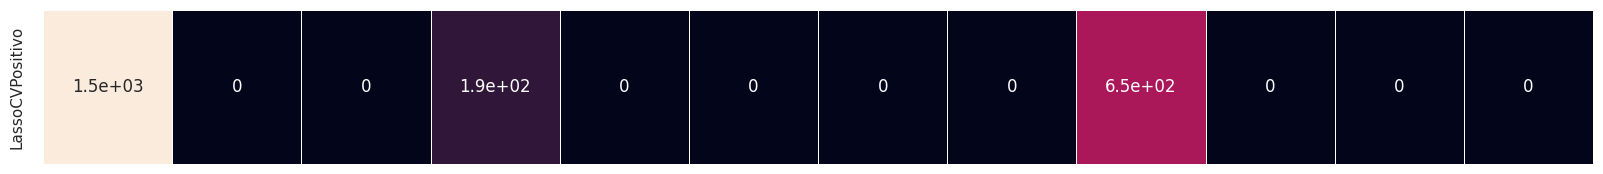

In [ ]:
weights = pd.DataFrame({'LinearReg':linealReg.coef_, 'RidgeCV':ridgeCV.coef_, 'LassoCV':lassoCV.coef_, 'LinearRegPositivo':linearRegPos.coef_, 'LassoCVPositivo':lassoPos.coef_},index=VarTrain.columns)

fig, ax = plt.subplots( figsize = (20,2))
sns.heatmap(weights.T.loc[['LinearReg'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=False)

plt.figure(figsize = (20,2))
sns.heatmap(weights.T.loc[['RidgeCV'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False)

plt.figure(figsize = (20,2))
sns.heatmap(weights.T.loc[['LassoCV'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False)

plt.figure(figsize = (20,2));
sns.heatmap(weights.T.loc[['LinearRegPositivo'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True)
plt.figure(figsize = (20,2))

sns.heatmap(weights.T.loc[['LassoCVPositivo'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False)

A continuación, vemos como tanto la regresión Ridge como la lineal tienen pesos muy similares y la que más se diferencia es la LASSO. 
Al aplicar el cambio de los pesos, se observa como la que sigue teniendo mucha influencia sobre el objetivo es "Gasoil", como ya se podía intuir en el primer apartado. Por otro lado, los pesos de las otras variables vemos como si se eliminan prácticamente todos.   


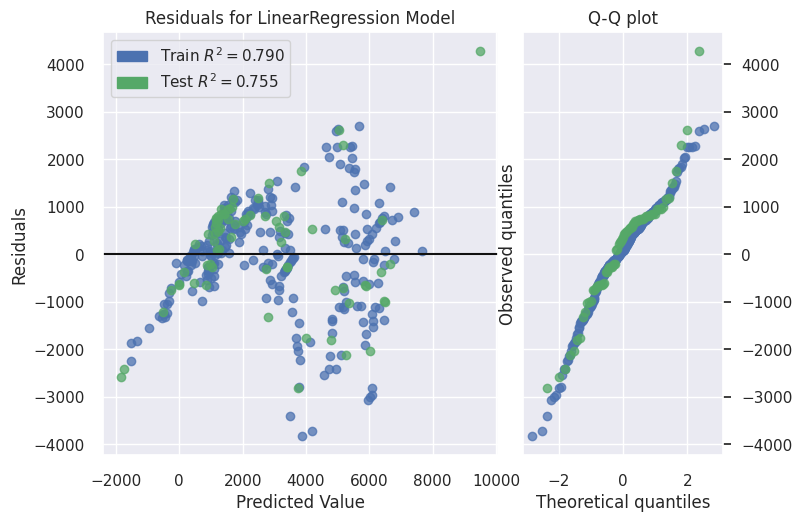

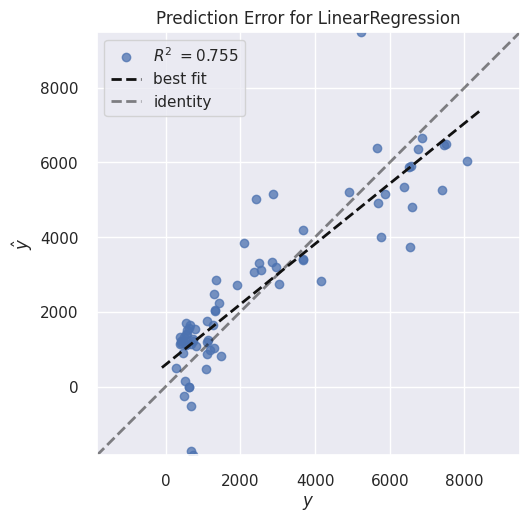

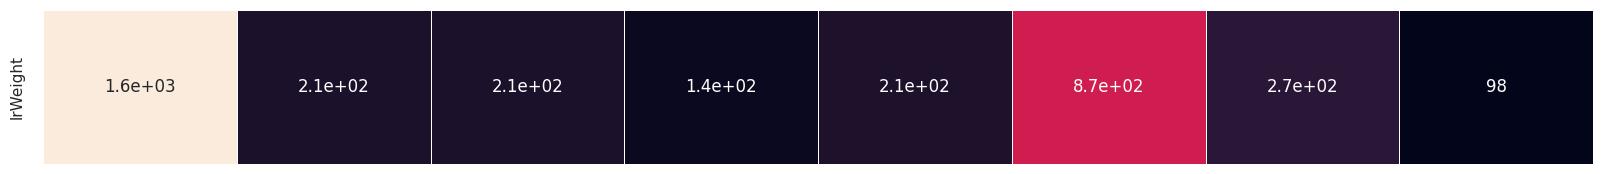

In [ ]:
# Quitamos las variables que menos sentido tienen
WeightVarsTest = VarTest.drop(["NO2 mitjana", "Viento UNI", "Matriculaciones", "Lluç"], axis=1)
WeightVarsTrain = VarTrain.drop(["NO2 mitjana", "Viento UNI", "Matriculaciones", "Lluç"], axis=1)

scaler = StandardScaler()
WeightVarsTrainSTD = scaler.fit_transform(WeightVarsTrain)
WeightVarsTestSTD = scaler.transform(WeightVarsTest)

lrWeight = LinearRegression().fit(WeightVarsTrainSTD, ObjTrain)
res = residuals_plot(lrWeight, WeightVarsTrainSTD, ObjTrain, WeightVarsTestSTD, ObjTest, is_fitted=True, qqplot=True, hist=False)
vis = prediction_error(lrWeight, WeightVarsTestSTD, ObjTest, is_fitted=True)

pesos = pd.DataFrame({'lrWeight':lrWeight.coef_},index=WeightVarsTrain.columns)
plt.figure(figsize = (20,2));
sns.heatmap(pesos.T.loc[['lrWeight'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);


Para finalizar, podemos observar que tras la eliminación de las varaibles los cambios obtenido son insignificantes, inclusive van a peor.
Esto se puede deber a qué aunque tengan poca influencia estas variables, el modelo podrá explicar mejor ciertas situaciones si tiene acceso a ellas. 
Aun así, el cambio es tan pequeño que si se eliminan no pasaría nada.  